In [8]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Load the dataset
data = pd.read_csv("C:/Users/shivanshu/Downloads/Bengaluru_House_Data.csv")

In [10]:
# Data Cleaning and Preprocessing
# Check available columns and drop only those that exist
columns_to_drop = ['society', 'availability', 'area_type']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(existing_columns_to_drop, axis=1)

# Fill missing values in the 'location' column with 'Unknown'
data['location'].fillna('Unknown', inplace=True)

# Fill missing values in numerical columns with their median values
if 'bath' in data.columns:
    data['bath'].fillna(data['bath'].median(), inplace=True)
if 'balcony' in data.columns:
    data['balcony'].fillna(data['balcony'].median(), inplace=True)

# Ensure 'size' column contains valid data and convert 'size' to a numerical value (number of BHK)
def extract_bhk(x):
    try:
        return int(x.split(' ')[0])
    except:
        return None

data['bhk'] = data['size'].apply(extract_bhk)
data = data.dropna(subset=['bhk'])

# Remove 'size' column as it's now redundant
data = data.drop('size', axis=1)

# Convert 'total_sqft' to numerical values, handling ranges and other formats
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            x = x.split('-')
            return (float(x[0]) + float(x[1])) / 2
        return float(x)
    except:
        return None

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)
data = data.dropna(subset=['total_sqft'])

# Encode categorical data using one-hot encoding
data = pd.get_dummies(data, columns=['location'], drop_first=True)

# Check the cleaned data
print(data.head())

   total_sqft  bath  balcony   price  bhk  location_ Banaswadi  \
0      1056.0   2.0      1.0   39.07  2.0                    0   
1      2600.0   5.0      3.0  120.00  4.0                    0   
2      1440.0   2.0      3.0   62.00  3.0                    0   
3      1521.0   3.0      1.0   95.00  3.0                    0   
4      1200.0   2.0      1.0   51.00  2.0                    0   

   location_ Basavangudi  location_ Bhoganhalli  \
0                      0                      0   
1                      0                      0   
2                      0                      0   
3                      0                      0   
4                      0                      0   

   location_ Devarabeesana Halli  location_ Devarachikkanahalli  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3       

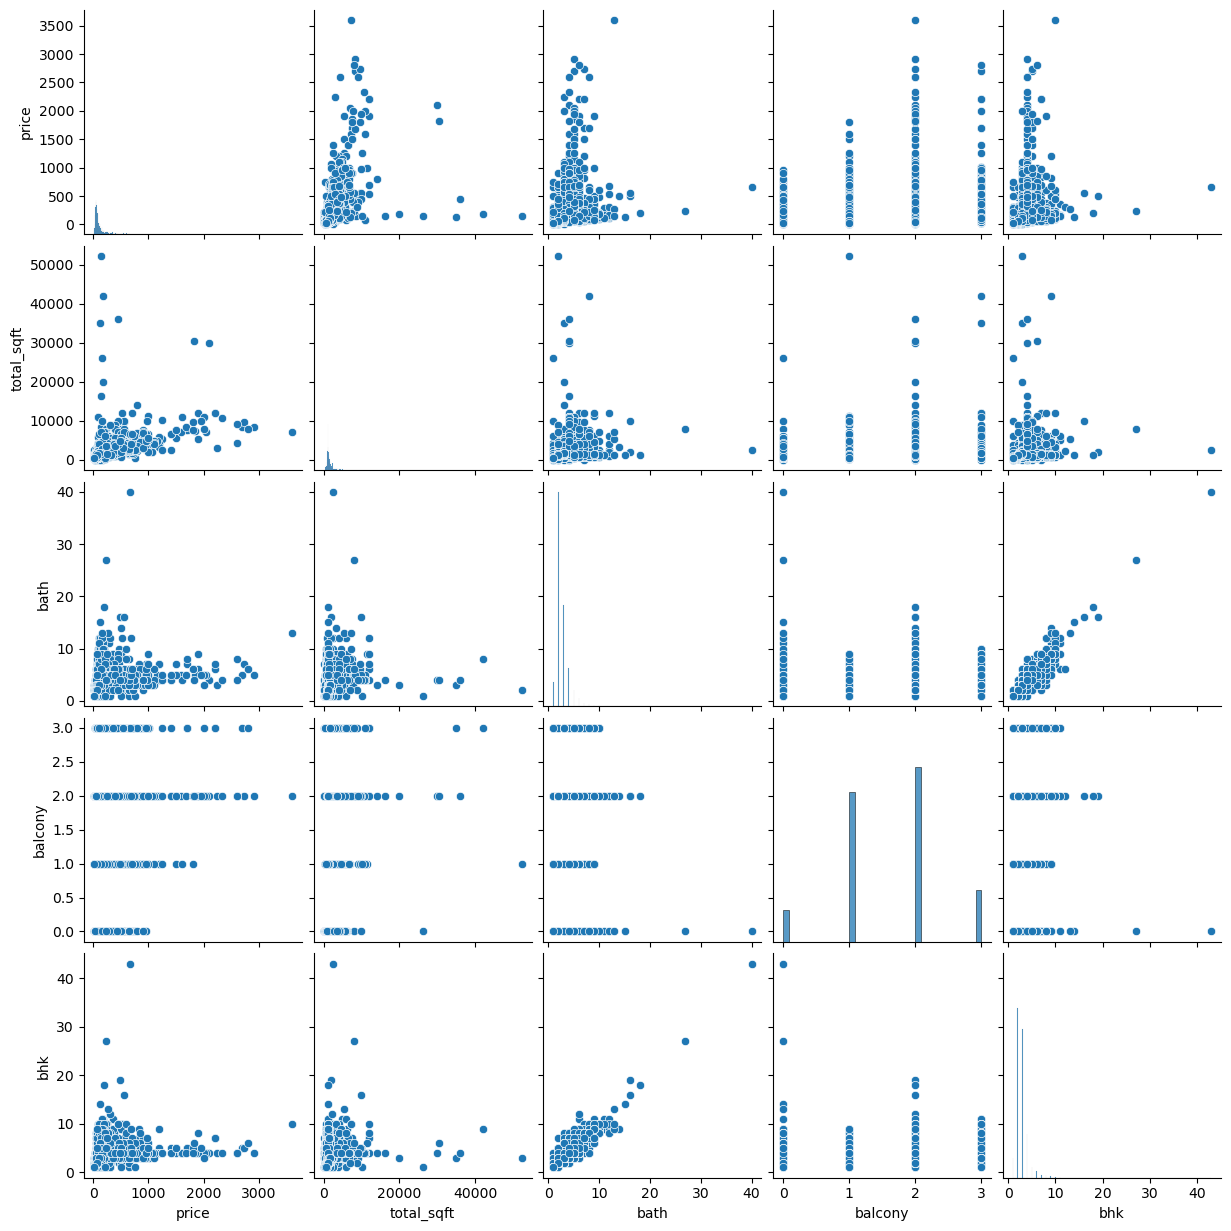

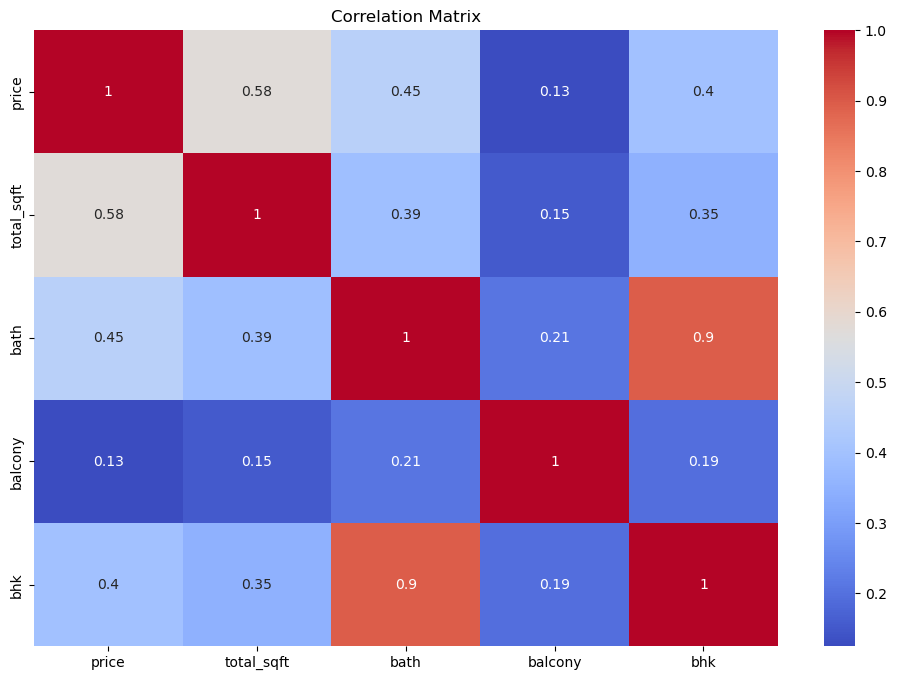

In [11]:
# Exploratory Data Analysis (EDA)
sns.pairplot(data[['price', 'total_sqft', 'bath', 'balcony', 'bhk']])
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data[['price', 'total_sqft', 'bath', 'balcony', 'bhk']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Model Building
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [13]:
# Model Evaluation
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error (MAE): 41.408323361872014
Root Mean Squared Error (RMSE): 105.36061563537882
R^2 Score: 0.480828444039738


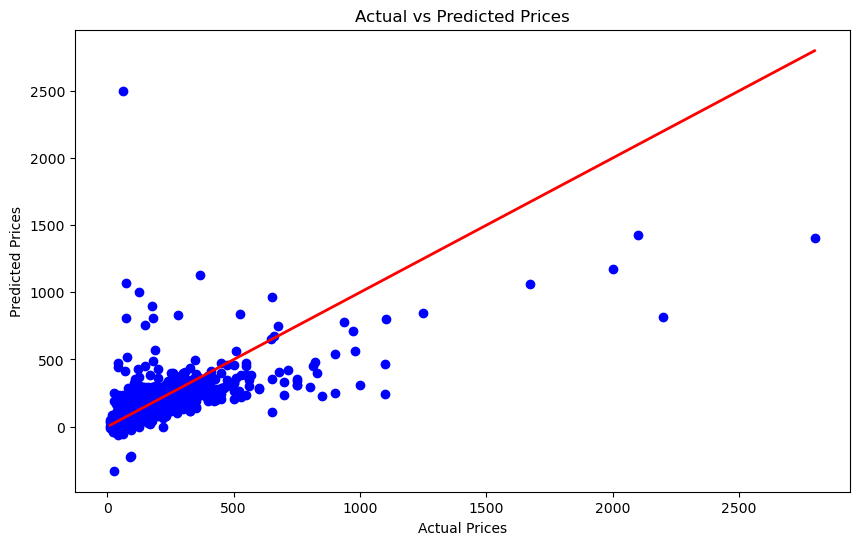

In [14]:
# Visualization and Reporting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()